In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

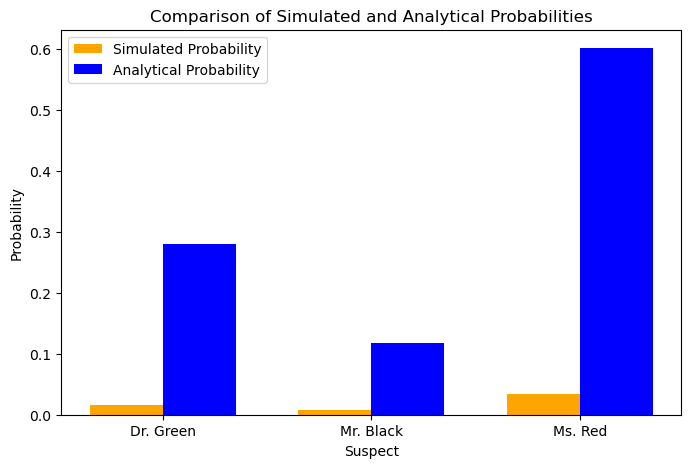

     Suspect  Simulated Probability  Analytical Probability
0  Dr. Green                0.01676                0.280936
1  Mr. Black                0.00706                0.117057
2    Ms. Red                0.03468                0.602007


In [4]:
# Define prior probabilities
priors = np.array([0.4, 0.35, 0.25])  # [Dr. Green, Mr. Black, Ms. Red]

# Define likelihoods
likelihoods = np.array([
    [0.2, 0.7, 0.3],  # Dr. Green: [Hack, Access, Eyewitness]
    [0.4, 0.5, 0.1],  # Mr. Black: [Hack, Access, Eyewitness]
    [0.8, 0.3, 0.6]   # Ms. Red: [Hack, Access, Eyewitness]
])

# Number of simulations
N = 100000

# Simulating suspect selection based on priors
suspects = np.random.choice([0, 1, 2], size=N, p=priors)

# Simulating evidence based on likelihoods
hack_evidence = np.random.rand(N) < likelihoods[suspects, 0]
access_evidence = np.random.rand(N) < likelihoods[suspects, 1]
eyewitness_evidence = np.random.rand(N) < likelihoods[suspects, 2]

# Computing joint probabilities from simulations
joint_counts = np.zeros(3)
for i in range(3):
    joint_counts[i] = np.sum((suspects == i) & hack_evidence & access_evidence & eyewitness_evidence)

joint_probs = joint_counts / N

# Compute analytical probabilities using Bayes' Theorem
evidence_prob = np.dot(priors, likelihoods[:, 0] * likelihoods[:, 1] * likelihoods[:, 2])
posterior = (priors * likelihoods[:, 0] * likelihoods[:, 1] * likelihoods[:, 2]) / evidence_prob

# Create DataFrame for display
df = pd.DataFrame({
    "Suspect": ["Dr. Green", "Mr. Black", "Ms. Red"],
    "Simulated Probability": joint_probs,
    "Analytical Probability": posterior
})

# Plot results using matplotlib
plt.figure(figsize=(8, 5))
bar_width = 0.35  # Width of bars

# X locations for groups
x_labels = ["Dr. Green", "Mr. Black", "Ms. Red"]
x = np.arange(len(x_labels))

# Create bar plots
plt.bar(x - bar_width/2, joint_probs, bar_width, label="Simulated Probability", color="orange")
plt.bar(x + bar_width/2, posterior, bar_width, label="Analytical Probability", color="blue")

# Formatting plot
plt.xlabel("Suspect")
plt.ylabel("Probability")
plt.title("Comparison of Simulated and Analytical Probabilities")
plt.xticks(ticks=x, labels=x_labels)
plt.legend()

# Display plot
plt.show()

# Display DataFrame
print(df)
